In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from utils import *

In [7]:
tex_fonts = {
    #source: https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    #"axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    'text.latex.preamble': r"\usepackage{amsmath}"
}

In [8]:
year = 2020

# Data

In [9]:
data_folder=''
data = gpd.read_file(data_folder + '{}_spatial_raw_master.geojson'.format(year))
data.set_index('geography code', inplace=True)

In [10]:
data.shape, data.dropna().shape

((33755, 167), (28641, 167))

In [11]:
data['o_total_quantity_per_capita'] = data['o_total_quantity_per_capita'].apply(np.log)

In [12]:
data[data['geometry'].isna()]

Empty GeoDataFrame
Columns: [LSOA21NM, centroid_x, centroid_y, c_percent asian, c_percent black, c_percent mixed, c_percent white, c_percent sikh, c_percent hindu, c_percent christian, c_percent jewish, c_percent buddhist, c_percent no religion, c_percent muslim, c_percent no central heating, c_percent wood heating, c_percent communal heating, c_percent TFW less than 2km, c_percent TFW 2km to 5km, c_percent TFW 60km and over, c_percent WFH, c_percent part-time, c_percent 15 hours or less worked, c_percent 49 or more hours worked, c_percent full-time, c_percent commute on foot, c_percent commute metro rail, c_percent commute bus, c_percent commute bicycle, c_percent commute train, c_percent commute car, c_percent same address, c_percent student moved to address, c_percent from within UK moved to address, c_percent outside UK moved to address, c_percent occupancy rating bedrooms +2, c_percent occupancy rating bedrooms 0, c_percent occupancy rating bedrooms +1, c_percent occupancy rating bedrooms -2, c_percent occupancy rating bedrooms -1, c_percent occupancy rating rooms +2, c_percent occupancy rating rooms 0, c_percent occupancy rating rooms +1, c_percent occupancy rating rooms -2, c_percent occupancy rating rooms -1, c_percent 1. Managers directors and senior officials, c_percent 2. Professional occupations, c_percent 3. Associate professional and technical occupations, c_percent 4. Administrative and secretarial occupations, c_percent 5. Skilled trades occupations, c_percent 6. Caring leisure and other service occupations, c_percent 7. Sales and customer service occupations, c_percent 8. Process plant and machine operatives, c_percent 9. Elementary occupations, c_percent born in the UK, c_percent 10 years or more, c_percent 2 years or more but less than 5 years, c_percent 5 years or more but less than 10 years, c_percent less than 2 years, c_pop_density, c_percent Aged 4 years and under, c_percent Aged 5 to 9 years, c_percent Aged 10 to 14 years, c_percent Aged 15 to 19 years, c_percent Aged 20 to 24 years, c_percent Aged 25 to 29 years, c_percent Aged 30 to 34 years, c_percent Aged 35 to 39 years, c_percent Aged 40 to 44 years, c_percent Aged 45 to 49 years, c_percent Aged 50 to 54 years, c_percent Aged 55 to 59 years, c_percent Aged 60 to 64 years, c_percent Aged 65 to 69 years, c_percent Aged 70 to 74 years, c_percent Aged 75 to 79 years, c_percent Aged 80 to 84 years, c_percent Aged 85 years and over, c_total population, c_percent never married and never registered a civil partnership, c_percent married or in a registered civil partnership, c_percent married or in a registered civil partnership married, c_percent married or in a registered civil partnership married opposite sex, c_percent married or in a registered civil partnership married same sex, c_percent married or in a registered civil partnership in a registered civil partnership, c_percent married or in a registered civil partnership in a registered civil partnership opposite sex, c_percent married or in a registered civil partnership in a registered civil partnership same sex, c_percent separated but still legally married or still legally in a civil partnership, c_percent separated but still legally married or still legally in a civil partnership separated but still married, c_percent separated but still legally married or still legally in a civil partnership separated but still in a registered civil partnership, c_percent divorced or civil partnership dissolved, c_percent divorced or civil partnership dissolved divorced, c_percent divorced or civil partnership dissolved formerly in a civil partnership now legally dissolved, c_percent widowed or surviving civil partnership partner, c_percent widowed or surviving civil partnership partner widowed, c_percent widowed or surviving civil partnership partner surviving partner from civil partnership, c_percent unemployed, c_percent very good health, c_percent good health, c_percent fair health, ...]
Index: []

[0 rows 

# LSOAs

In [15]:
auxiliary_data_folder = ''
fn = 'LSOA_(Dec_2021)_Boundaries_Generalised_Clipped_EW_(BGC)'
fp = auxiliary_data_folder + '{}.shp'.format(fn)
lsoas_2021 = gpd.read_file(fp).rename(columns={'LSOA21CD':'geography code'})

(54019.25349999957, 684303.1165, -27256.74028000039, 690148.7458800001)

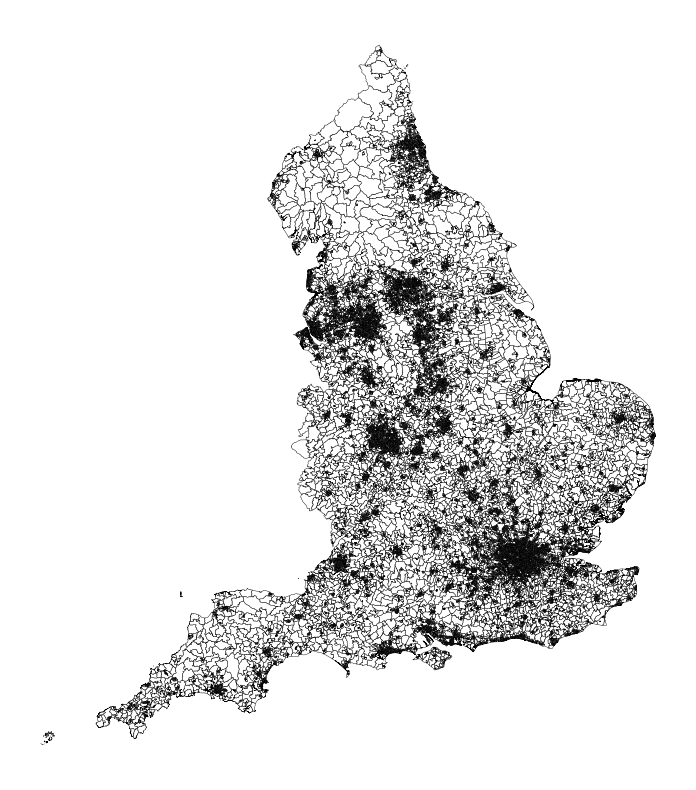

In [17]:
lsoas_2021 = lsoas_2021[lsoas_2021["geography code"].str.startswith("E")]

# Plotting the GeoPandas DataFrame
ax = lsoas_2021.plot(figsize=(15, 10), edgecolor='black', facecolor='white', linewidth=0.3)

# # Remove the axes
plt.axis('off')

# merge data and lsoas 

In [40]:
# df = data.join(lsoas_2021[['geography code']].set_index('geography code'), on='geography code', how='right')

In [41]:
# df.shape

# plot maps

In [18]:
# gdf = gpd.GeoDataFrame(data, geometry='geometry')
gdf = data.copy()

In [19]:
# gdf.set_index('geography code', inplace=True)

In [20]:
gdf.head(10)

LSOA21NM     centroid_x     centroid_y  \
geography code                                                            
E01000001             City of London 001A  532151.194178  181615.201393   
E01000002             City of London 001B  532443.686041  181645.724884   
E01000003             City of London 001C  532207.014825  182030.129598   
E01000005             City of London 001E  533618.348516  181157.354255   
E01000006       Barking and Dagenham 016A  544934.369716  184297.546524   
E01000007       Barking and Dagenham 015A  544140.628715  184437.591450   
E01000008       Barking and Dagenham 015B  543631.449397  184385.251864   
E01000009       Barking and Dagenham 016B  544602.674652  184457.531467   
E01000011       Barking and Dagenham 016C  544382.715979  184738.624036   
E01000012       Barking and Dagenham 015D  543917.351837  184715.713458   

                c_percent asian  c_percent black  c_percent mixed  \
geography code                                                      
E01000001              0.107191         0.007463         0.037992   
E01000002              0.130592         0.007937         0.043290   
E01000003              0.094913         0.034739         0.062655   
E01000005              0.321526         0.108084         0.071753   
E01000006              0.479675         0.108401         0.037940   
E01000007              0.319683         0.284928         0.062973   
E01000008              0.256125         0.398664         0.048441   
E01000009              0.489751         0.111911         0.029363   
E01000011              0.548122         0.100939         0.024061   
E01000012              0.336031         0.292164         0.052811   

                c_percent white  c_percent sikh  c_percent hindu  \
geography code                                                     
E01000001              0.801221        0.000000         0.026441   
E01000002              0.782107        0.000000         0.015173   
E01000003              0.741315        0.001860         0.011159   
E01000005              0.385104        0.000000         0.014519   
E01000006              0.327913        0.036295         0.056880   
E01000007              0.288025        0.009632         0.041280   
E01000008              0.250000        0.013363         0.020601   
E01000009              0.303601        0.051552         0.075388   
E01000011              0.283451        0.046443         0.041152   
E01000012              0.274702        0.015785         0.044369   

                c_percent christian  ...  e_snow_and_ice  \
geography code                       ...                   
E01000001                  0.345763  ...        0.092108   
E01000002                  0.338150  ...        0.108474   
E01000003                  0.340360  ...        0.088695   
E01000005                  0.367514  ...        0.072893   
E01000006                  0.371614  ...        0.032890   
E01000007                  0.381493  ...        0.050718   
E01000008                  0.471604  ...        0.034572   
E01000009                  0.305987  ...        0.030667   
E01000011                  0.330394  ...        0.034769   
E01000012                  0.374573  ...        0.036261   

                o_diabetes_quantity_per_capita  o_opioids_quantity_per_capita  \
geography code                                                                  
E01000001                             0.834958                       0.129840   
E01000002                             0.957987                       0.276066   
E01000003                             1.532698                       0.592661   
E01000005                             0.918772                       0.250619   
E01000006                            33.986967                       4.982723   
E01000007                            34.714072                       4.215028   
E01000008                            38.969994                       4.341368   
E01000009                           

In [21]:
gdf.shape

(33755, 167)

In [22]:
4625/33755

0.13701673826099836

In [23]:
gdf[gdf['o_diabetes_quantity_per_capita'].isna()]['geometry']

geography code
E01013079    POLYGON ((534928.793 427161.609, 535059.522 42...
E01013082    POLYGON ((531953.144 430981.672, 532894.344 42...
E01013083    POLYGON ((534129.044 428335.478, 534487.882 42...
E01013086    POLYGON ((532331.289 422826.240, 532347.846 42...
E01014383    POLYGON ((352329.812 164021.095, 352382.688 16...
                                   ...                        
E01035758    POLYGON ((440023.734 188362.550, 440025.000 18...
E01035759    POLYGON ((448931.938 193306.859, 449093.219 19...
E01035760    POLYGON ((450708.409 190217.086, 450944.308 19...
E01035761    POLYGON ((448999.655 189423.097, 448975.672 18...
E01035762    POLYGON ((446534.981 225101.393, 446996.281 22...
Name: geometry, Length: 1956, dtype: geometry

In [24]:
gdf[gdf['e_total_aerosol_optical_depth_at_550nm_surface'].isna()]

LSOA21NM     centroid_x     centroid_y  \
geography code                                                            
E01000007       Barking and Dagenham 015A  544140.628715  184437.591450   
E01000009       Barking and Dagenham 016B  544602.674652  184457.531467   
E01000018       Barking and Dagenham 009D  549322.151534  185265.403035   
E01000036       Barking and Dagenham 010B  550432.459743  185260.956387   
E01000038       Barking and Dagenham 003C  550720.767282  187157.610899   
...                                   ...            ...            ...   
E01035706              Tower Hamlets 036E  537870.179827  179234.903068   
E01035715                Westminster 007H  525905.310144  182146.657722   
E01035717                Westminster 014H  525370.527897  181485.018281   
E01035720                Westminster 021G  530005.025734  178506.147240   
E01035744                     Oxford 019D  454242.520217  204569.028177   

                c_percent asian  c_percent black  c_percent mixed  \
geography code                                                      
E01000007              0.319683         0.284928         0.062973   
E01000009              0.489751         0.111911         0.029363   
E01000018              0.130068         0.186374         0.042793   
E01000036              0.278610         0.199591         0.019074   
E01000038              0.166873         0.111663         0.040943   
...                         ...              ...              ...   
E01035706              0.426026         0.060418         0.065066   
E01035715              0.109150         0.031340         0.047190   
E01035717              0.080824         0.088220         0.079239   
E01035720              0.110107         0.069022         0.105998   
E01035744              0.175521         0.050437         0.064560   

                c_percent white  c_percent sikh  c_percent hindu  \
geography code                                                     
E01000007              0.288025        0.009632         0.041280   
E01000009              0.303601        0.051552         0.075388   
E01000018              0.624437        0.004505         0.018018   
E01000036              0.471390        0.012925         0.022449   
E01000038              0.647022        0.022277         0.033416   
...                         ...             ...              ...   
E01035706              0.402014        0.005431         0.063615   
E01035715              0.729467        0.001440         0.017279   
E01035717              0.678817        0.000528         0.003166   
E01035720              0.654889        0.001643         0.010682   
E01035744              0.659045        0.000672         0.008742   

                c_percent christian  ...  e_snow_and_ice  \
geography code                       ...                   
E01000007                  0.381493  ...        0.050718   
E01000009                  0.305987  ...        0.030667   
E01000018                  0.498311  ...        0.029875   
E01000036                  0.517687  ...        0.054901   
E01000038                  0.516708  ...        0.031589   
...                             ...  ...             ...   
E01035706                  0.294026  ...        0.039928   
E01035715                  0.392729  ...        0.030985   
E01035717                  0.402111  ...        0.027339   
E01035720                  0.458505  ...        0.033190   
E01035744                  0.273033  ...        0.038449   

                o_diabetes_quantity_per_capita  o_opioids_quantity_per_capita  \
geography code                                                                  
E01000007                            34.714072                       4.215028   
E01000009                            28.144607                       3.664536   
E01000018                            37.394486                       9.484960   
E01000036                            60.185383                      13.679222   
E010000

In [25]:
gdf[gdf['e_surface_thermal_radiation_downwards_sum'].isna()]['geometry']

geography code
E01006738    POLYGON ((340574.000 384009.000, 340660.143 38...
E01006986    POLYGON ((329099.577 408371.765, 329135.715 40...
E01006989    POLYGON ((328277.950 408149.187, 328269.000 40...
E01006990    POLYGON ((329123.140 407734.513, 329137.779 40...
E01006991    POLYGON ((328308.885 407173.153, 328343.165 40...
                                   ...                        
E01035367    POLYGON ((340215.886 377155.951, 340249.639 37...
E01035368    POLYGON ((339854.282 377082.937, 339909.488 37...
E01035631    POLYGON ((431767.072 580975.889, 431769.034 58...
E01035632    POLYGON ((432374.150 580586.250, 432441.559 58...
E01035635    POLYGON ((428983.396 580917.682, 429135.838 58...
Name: geometry, Length: 1479, dtype: geometry

# test v2

In [26]:
# def plot_variable(gdf, variable, variable_name):

#     if variable.startswith('e'):
#         colormap = 'spring'
#     elif variable.startswith('o'):
#         colormap = 'cool'
#     elif variable.startswith('c'):
#         colormap = 'viridis'
#     else:
#         colormap = 'coolwarm'


#     # Plotting the GeoPandas DataFrame
#     ax = gdf.plot(column=variable, legend=True, figsize=(15, 10), cmap=colormap);

#     # Remove the axes
#     plt.axis('off')

#     # Customize the legend font size
#     # Get the color bar object
#     cax = plt.gcf().axes[-1]

#     # Customize the color bar font size
#     cax.tick_params(labelsize=18)

#     # Remove the axes
#     plt.title(variable_name, fontsize=25);

In [27]:
def plot_variable_v2(gdf, variable, variable_name):

    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # Parameters to display missing data in black
    missing_data_color = {
        'color': 'black',
        # 'color':'#808080',
        # 'edgecolor': 'black',
        # 'hatch': '///',  # this is optional, if you'd like a hatch pattern for missing data
        'label': 'Missing Data'
    }

    # Plotting the GeoPandas DataFrame
    ax = gdf.plot(column=variable, legend=True, figsize=(15, 10), cmap=colormap, missing_kwds=missing_data_color)

    # Remove the axes
    plt.axis('off')

    # Customize the legend font size
    # Get the color bar object
    cax = plt.gcf().axes[-1]

    # Customize the color bar font size
    cax.tick_params(labelsize=33)

    # Title
    plt.title(variable_name, fontsize=44)

    return plt

In [28]:
def plot_variable(gdf, variable, variable_name):

    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # Plotting the GeoPandas DataFrame
    ax = gdf.plot(column=variable, legend=True, figsize=(15, 10), cmap=colormap)

    # Remove the axes
    plt.axis('off')

    # Customize the legend font size
    # Get the color bar object
    cax = plt.gcf().axes[-1]

    # Customize the color bar font size
    cax.tick_params(labelsize=33)

    # Remove the axes
    plt.title(variable_name, fontsize=44)

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\0\\anaconda3\\envs\\envGEOG0051\\Lib\\site-packages\\matplotlib\\pyplot.py'>

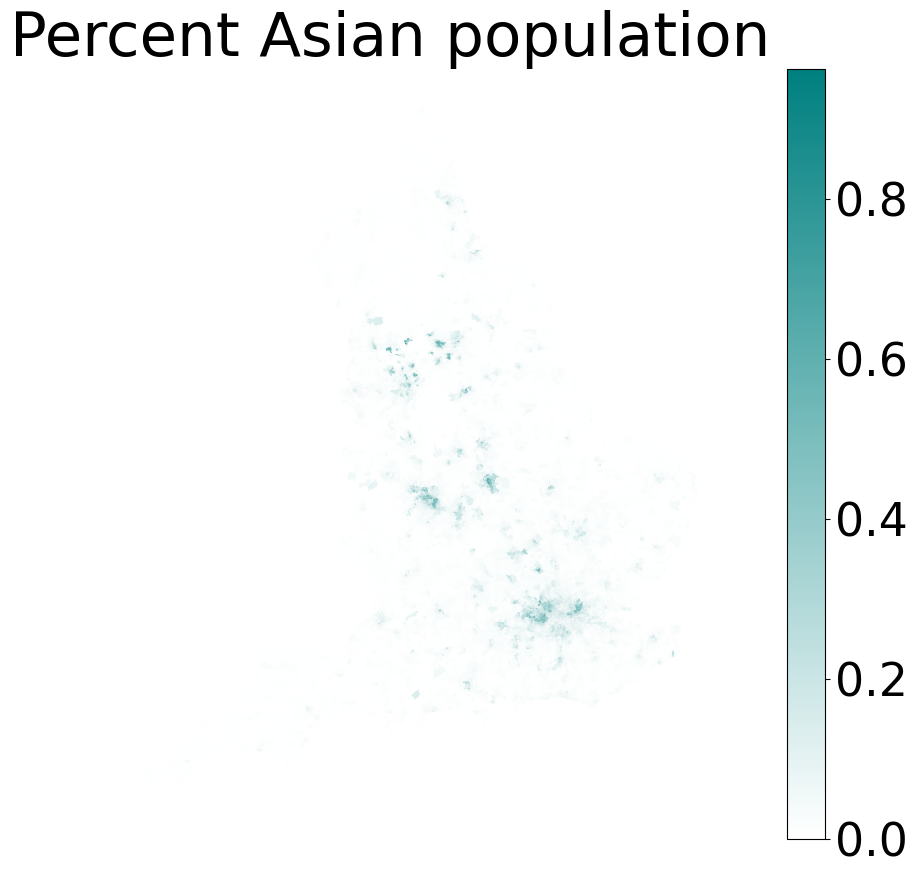

In [29]:
variable = 'c_percent asian'
variable_name = 'Percent Asian population'
plot_variable_v2(gdf, variable, variable_name)

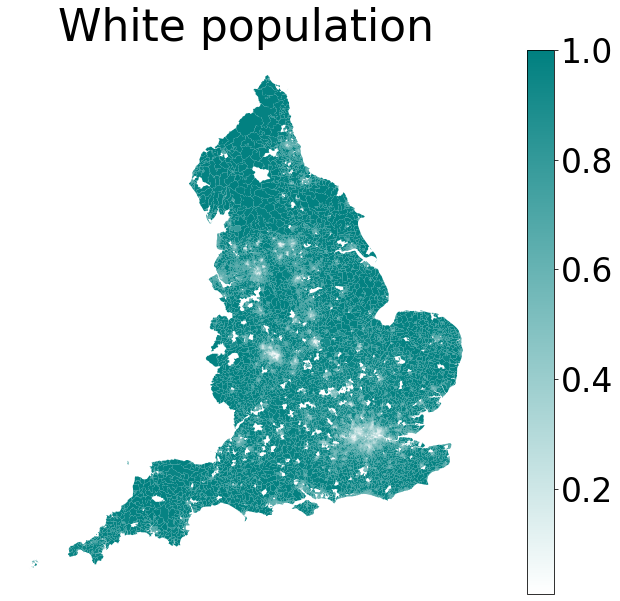

In [12]:
variable = 'c_percent white'
variable_name = 'White population'
plot_variable_v2(gdf, variable, variable_name)

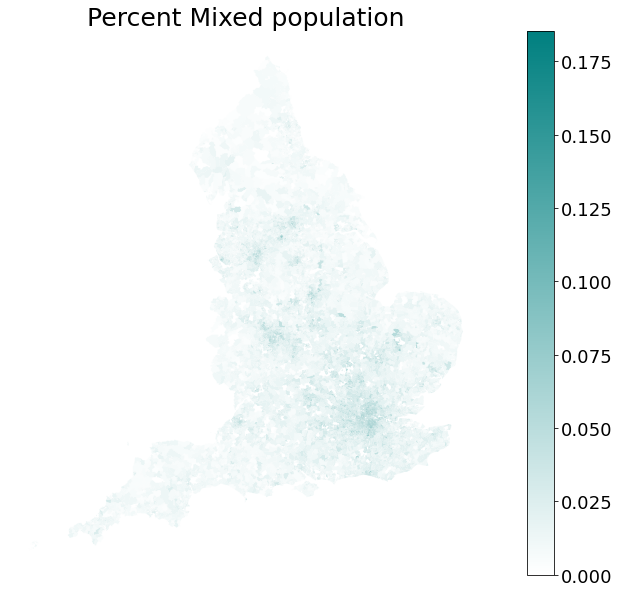

In [11]:
variable = 'c_percent mixed'
variable_name = 'Percent Mixed population'
plot_variable(gdf, variable, variable_name)

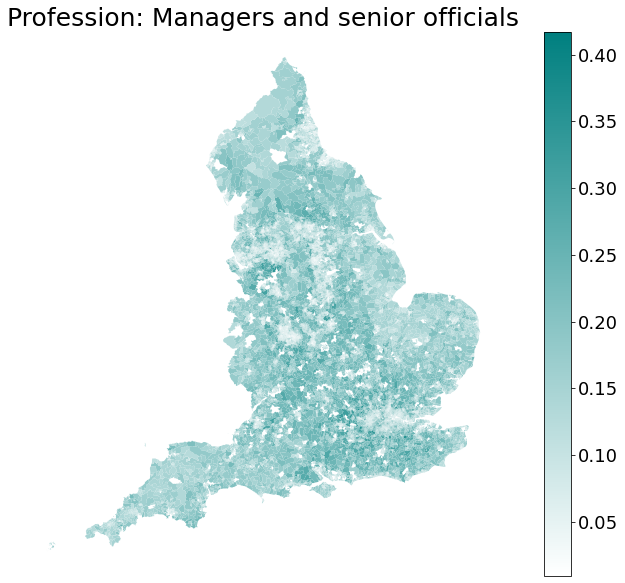

In [12]:
variable = 'c_percent 1. Managers directors and senior officials'
variable_name = 'Profession: Managers and senior officials'
plot_variable(gdf, variable, variable_name)


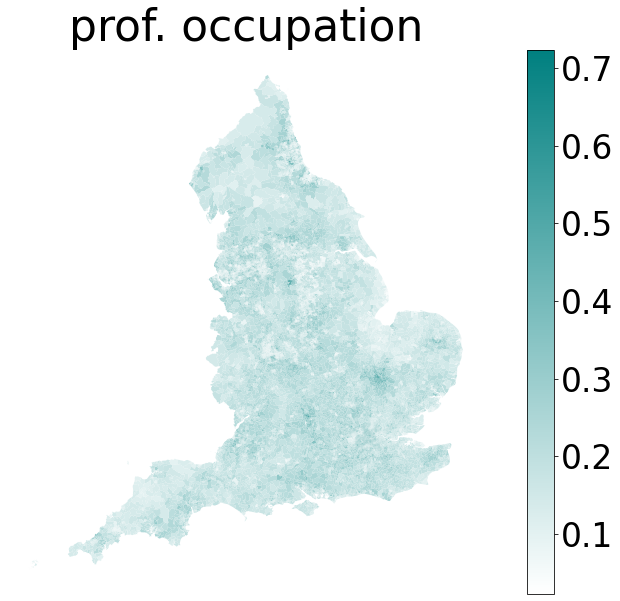

In [26]:
variable = 'c_percent 2. Professional occupations'
variable_name = 'prof. occupation'
plt = plot_variable(gdf, variable, variable_name)

plt.savefig("../../figures/map_occupation.jpg", dpi=300)

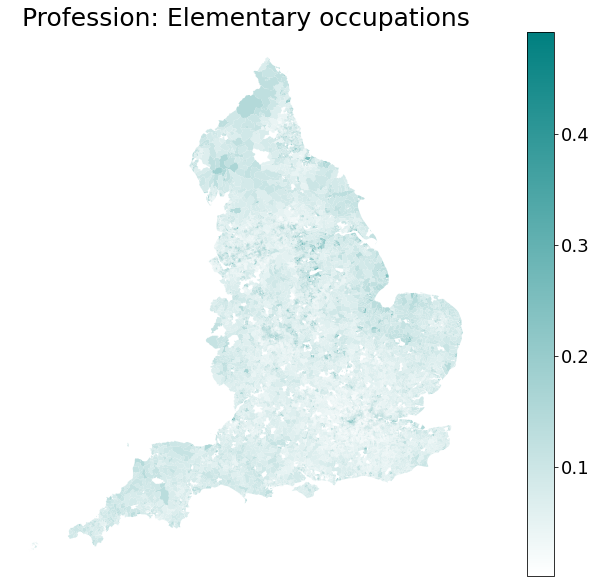

In [14]:
variable = 'c_percent 9. Elementary occupations'
variable_name = 'Profession: Elementary occupations'
plot_variable(gdf, variable, variable_name)


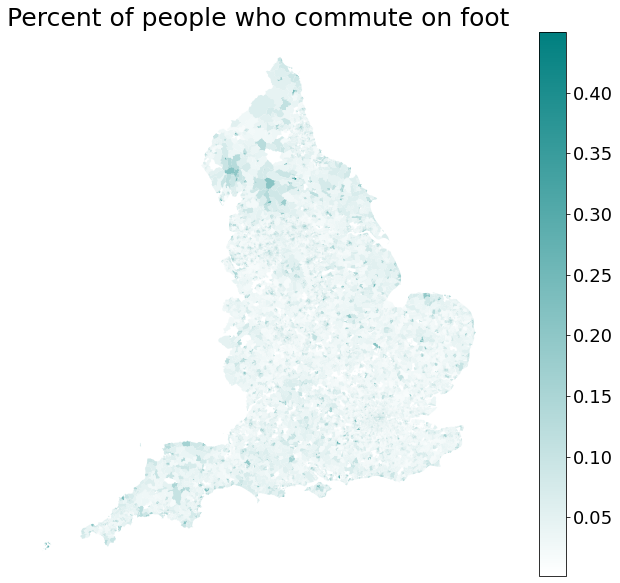

In [15]:
variable =  'c_percent commute on foot'
variable_name = 'Percent of people who commute on foot'
plot_variable(gdf, variable, variable_name)


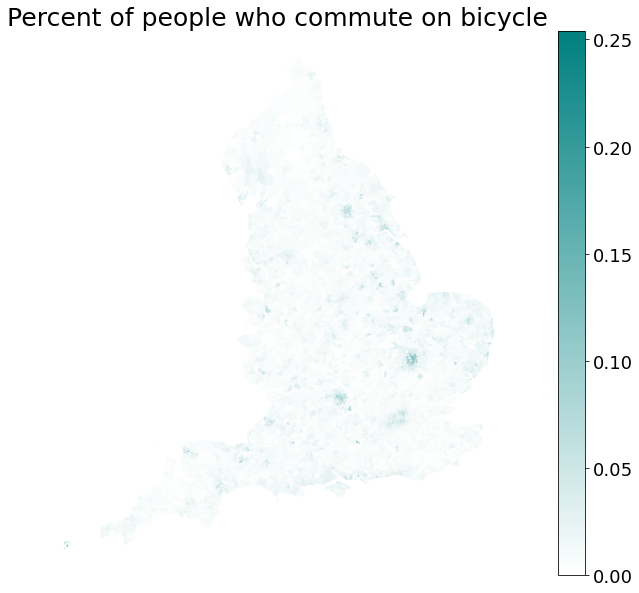

In [16]:
variable =  'c_percent commute bicycle'
variable_name = 'Percent of people who commute on bicycle'
plot_variable(gdf, variable, variable_name)

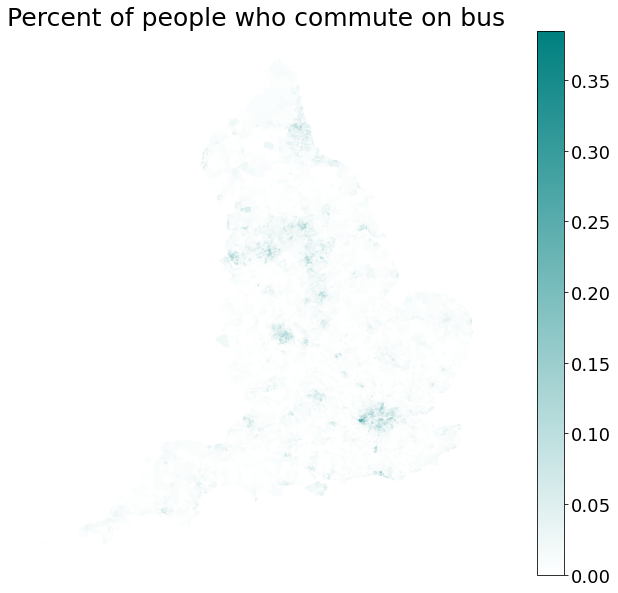

In [17]:
variable =  'c_percent commute bus'
variable_name = 'Percent of people who commute on bus'
plot_variable(gdf, variable, variable_name)

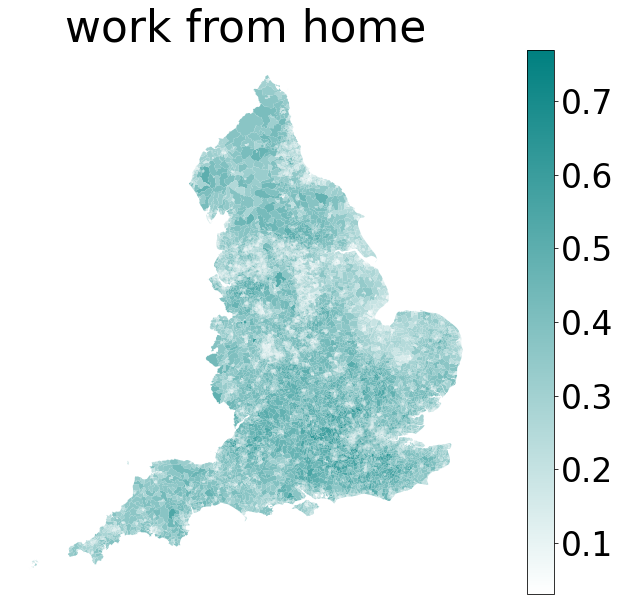

In [27]:
variable =  'c_percent WFH'
variable_name = 'work from home'
plot_variable(gdf, variable, variable_name)

plt.savefig("../../figures/map_WFH.jpg", dpi=300)

In [50]:
# variable =  'c_net annual income'
# variable_name = 'net annual income'
# plot_variable_v2(gdf, variable, variable_name)

# Environment

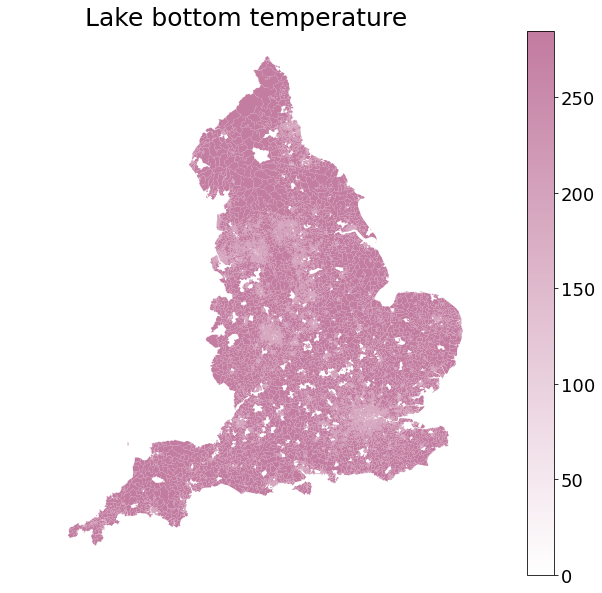

In [19]:
variable =  'e_lake_bottom_temperature'
variable_name = 'Lake bottom temperature'
plot_variable(gdf, variable, variable_name)

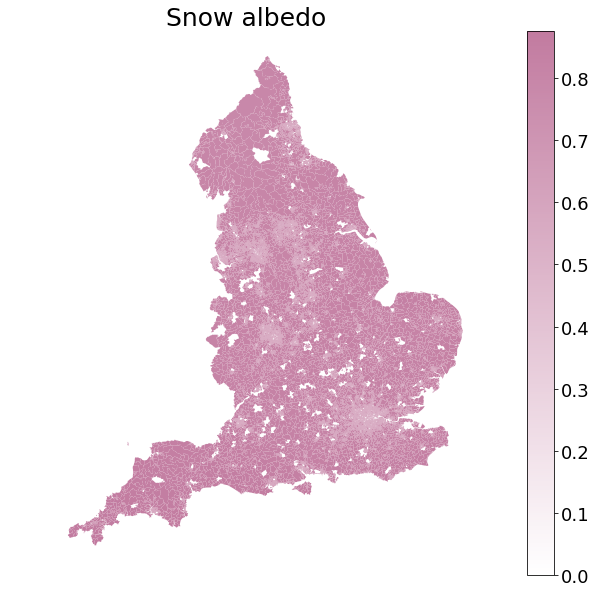

In [20]:
variable =  'e_snow_albedo'
variable_name = 'Snow albedo'
plot_variable(gdf, variable, variable_name)

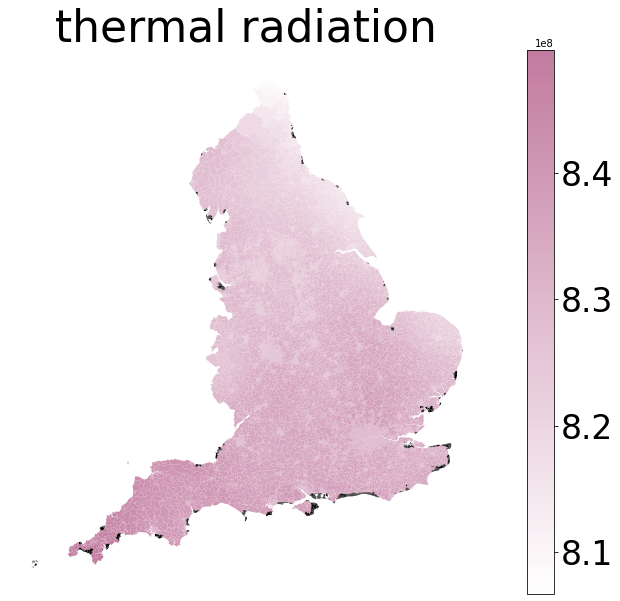

In [96]:
variable =  'e_surface_thermal_radiation_downwards_sum'
variable_name = 'thermal radiation'
plot_variable_v2(gdf, variable, variable_name)

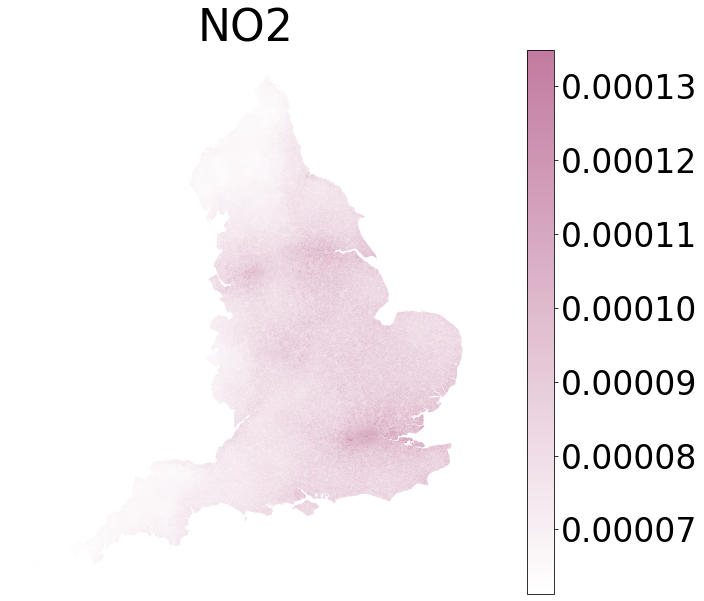

In [28]:
variable =  'e_NO2'
variable_name = 'NO2'
plt = plot_variable_v2(gdf, variable, variable_name)

plt.savefig("../../figures/map_NO2.jpg", dpi=300)

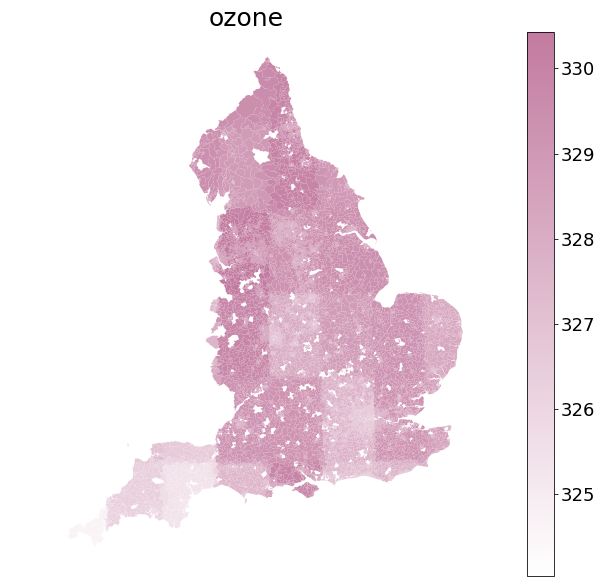

In [23]:
variable =  'e_ozone'
variable_name = 'ozone'
plot_variable(gdf, variable, variable_name)


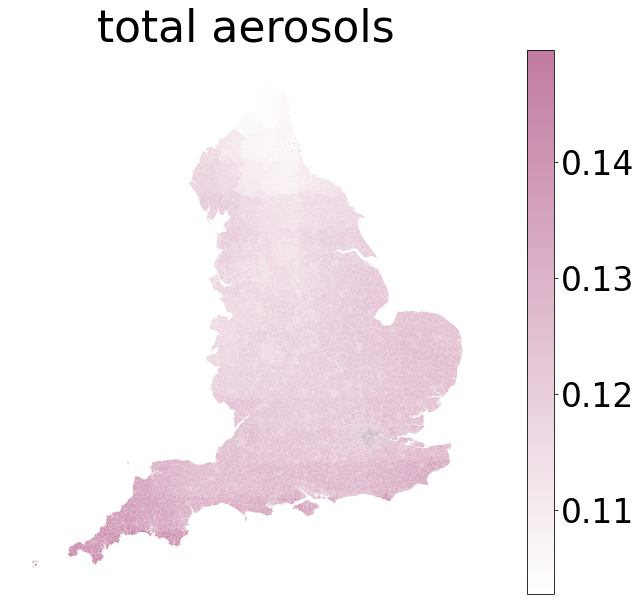

In [89]:
variable =  'e_total_aerosol_optical_depth_at_550nm_surface'
variable_name = 'total aerosols'
plot_variable_v2(gdf, variable, variable_name)


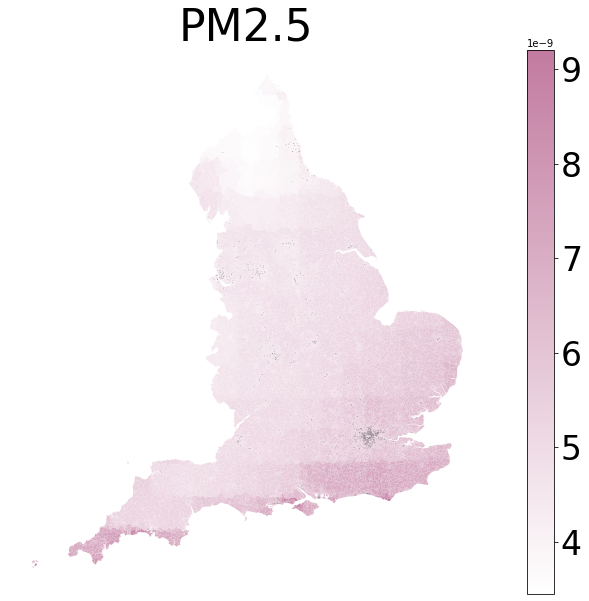

In [74]:
variable =  'e_particulate_matter_d_less_than_25_um_surface'
variable_name = 'PM2.5'
plot_variable_v2(gdf, variable, variable_name)


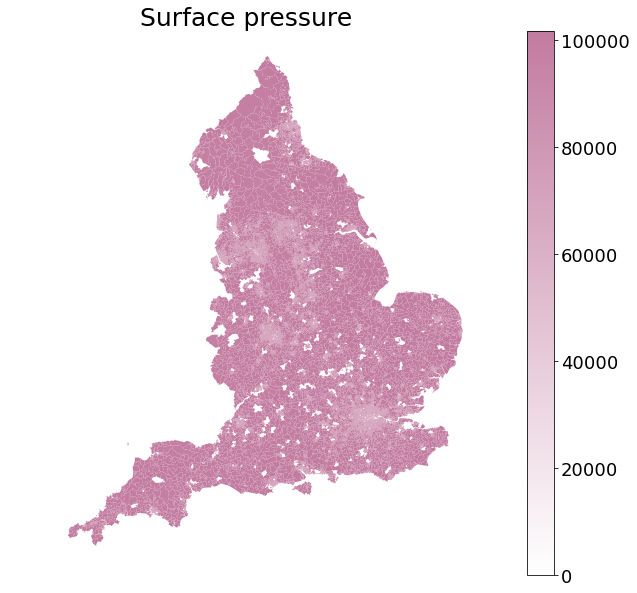

In [26]:
variable =  'e_surface_pressure'
variable_name = 'Surface pressure'
plot_variable(gdf, variable, variable_name)

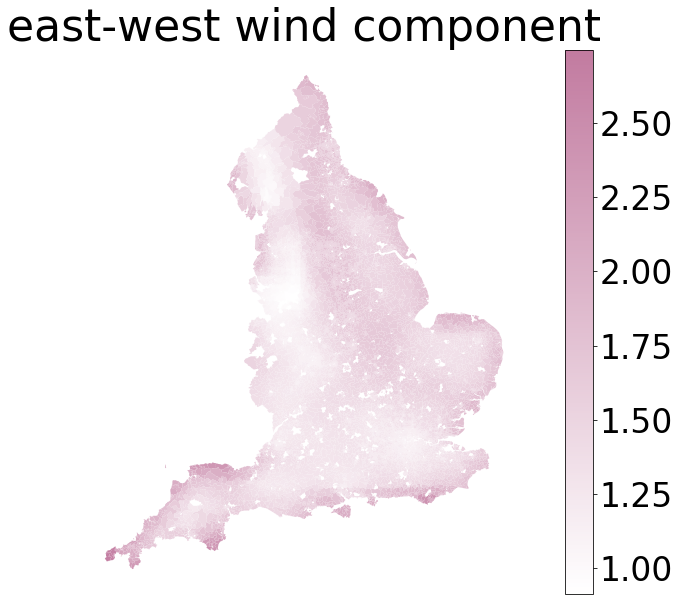

In [18]:
variable =  'e_u_component_of_wind_10m'
variable_name = 'east-west wind component'
plot_variable(gdf, variable, variable_name)

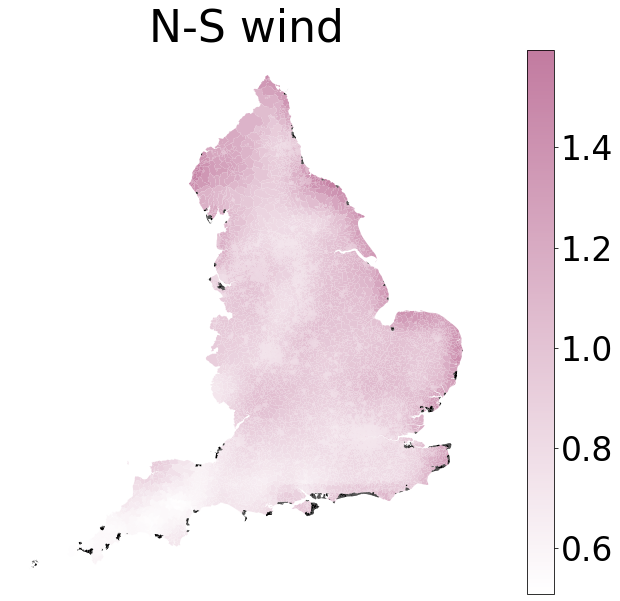

In [97]:
variable =  'e_v_component_of_wind_10m'
variable_name = 'N-S wind'
plot_variable_v2(gdf, variable, variable_name)

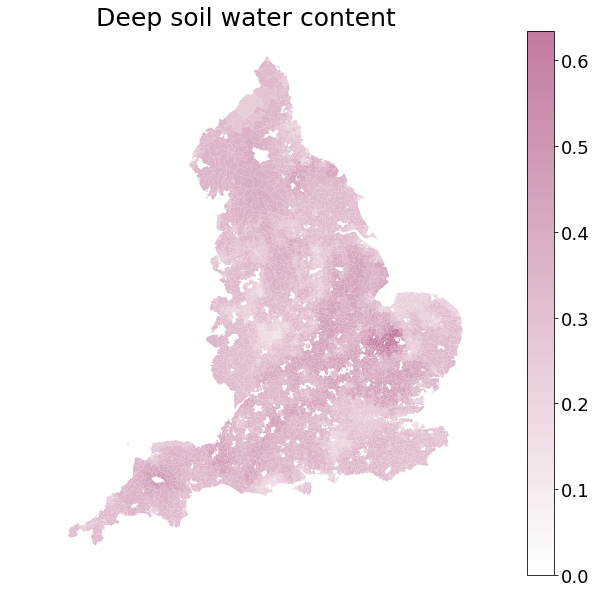

In [29]:
variable =  'e_volumetric_soil_water_layer_3'
variable_name = 'Deep soil water content'
plot_variable(gdf, variable, variable_name)

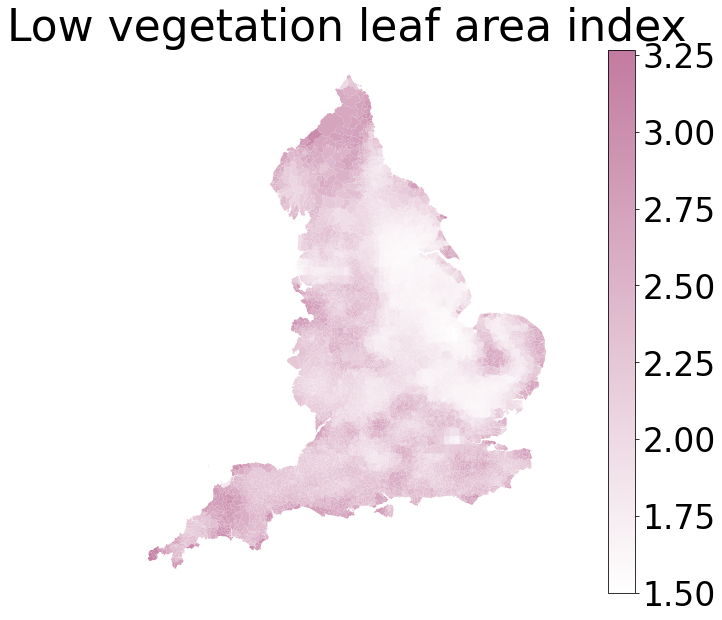

In [76]:
variable =  'e_leaf_area_index_low_vegetation'
variable_name = 'Low vegetation leaf area index'
plot_variable(gdf, variable, variable_name)



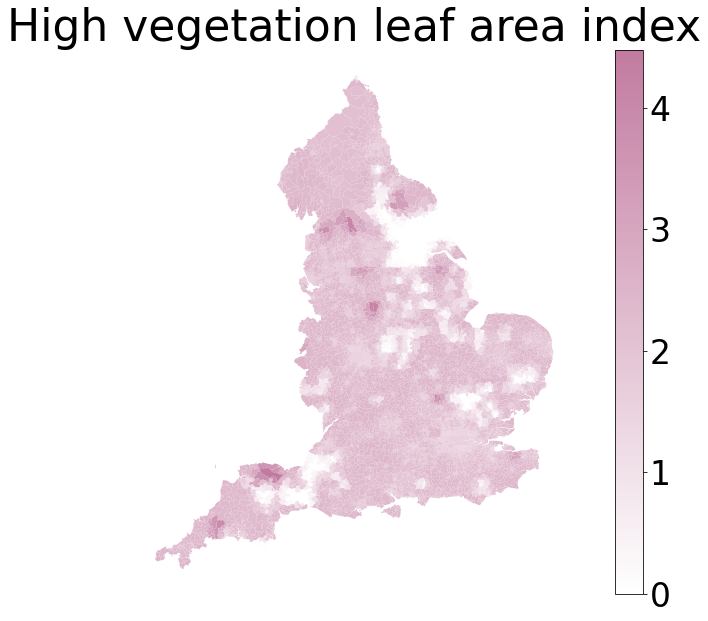

In [77]:
variable =  'e_leaf_area_index_high_vegetation'
variable_name = 'High vegetation leaf area index'
plot_variable(gdf, variable, variable_name)



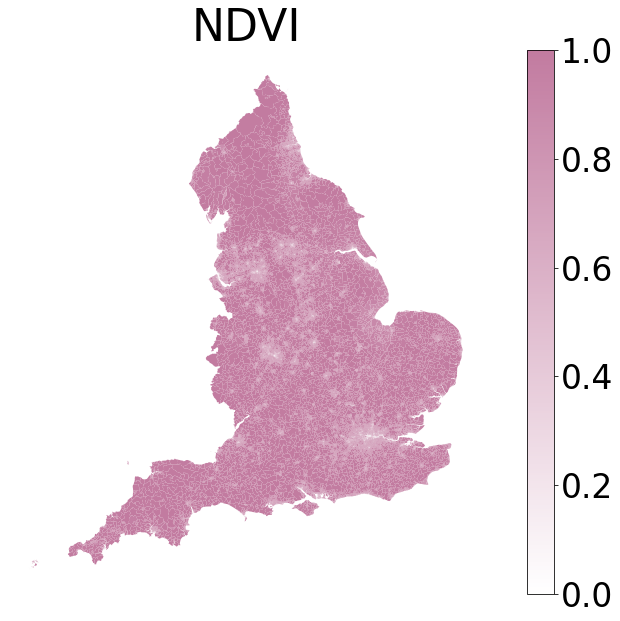

In [78]:
variable =  'e_ndvi'
variable_name = 'NDVI'
plot_variable_v2(gdf, variable, variable_name)

# Outcomes

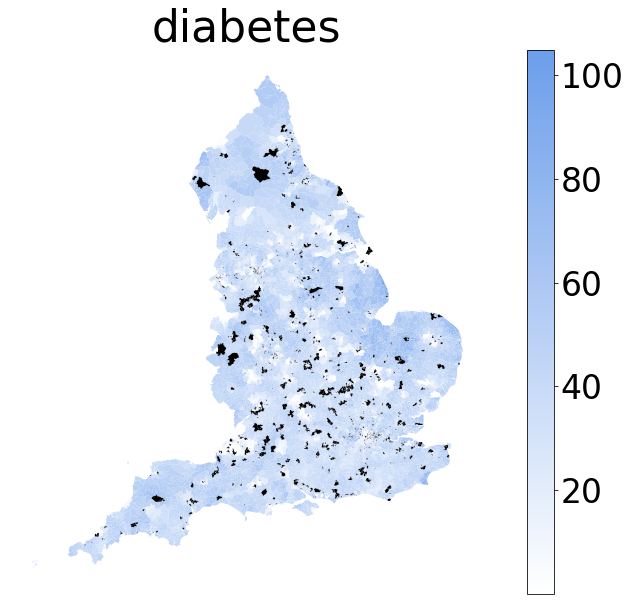

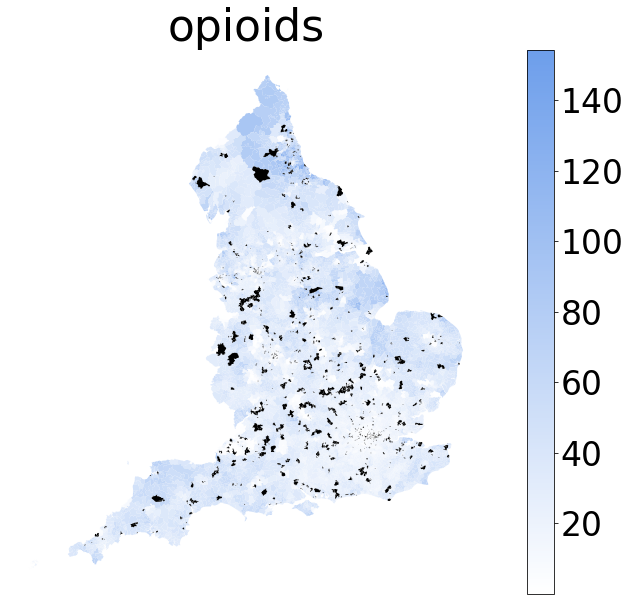

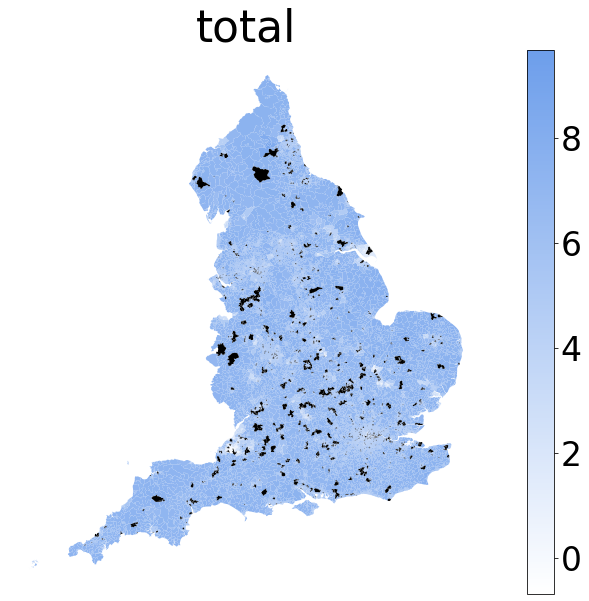

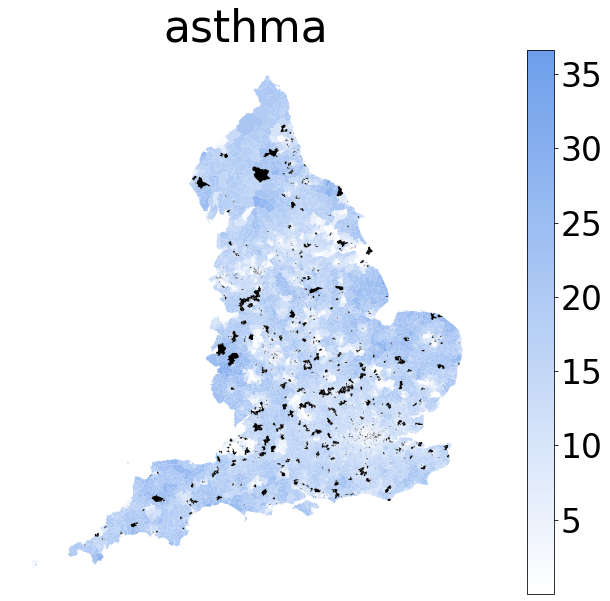

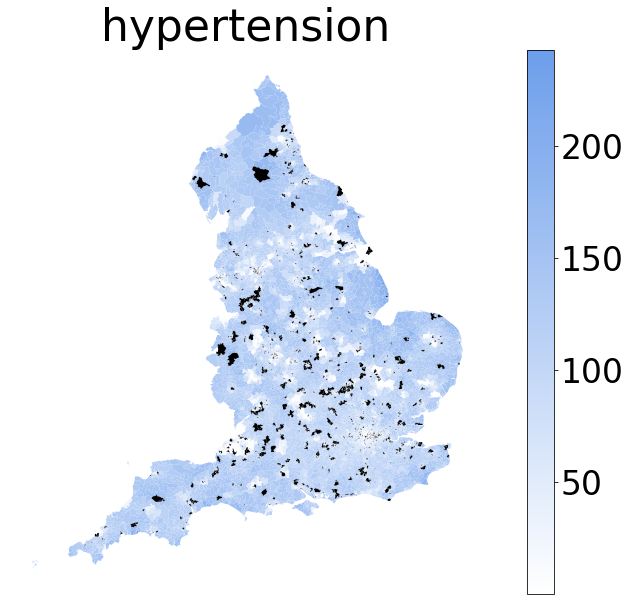

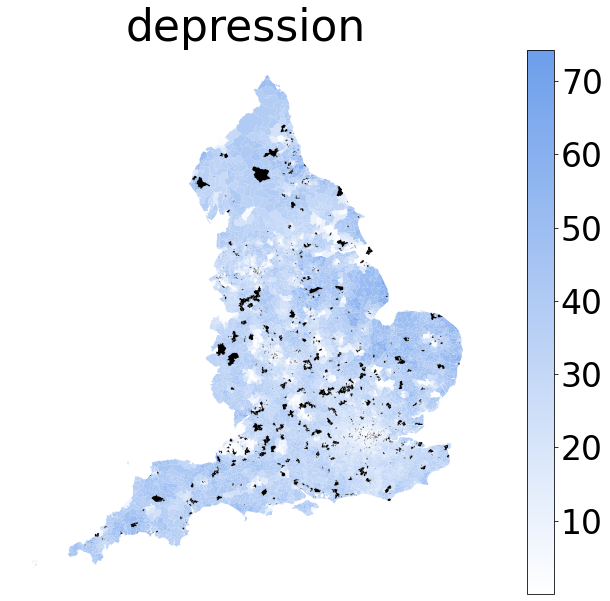

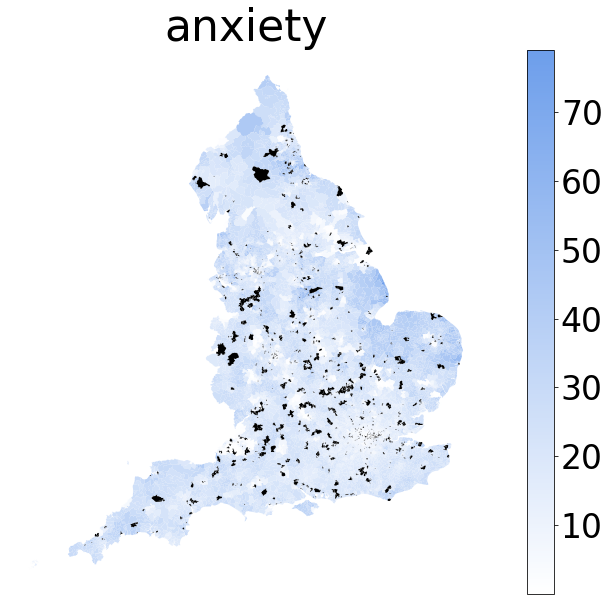

In [98]:
for c in [c for c in gdf.columns if c.startswith('o_') and 'OME' not in c]:
    variable = c
    variable_name = c.replace('o_', '').replace('_quantity_per_capita', '')
    plot_variable_v2(gdf, variable, variable_name)

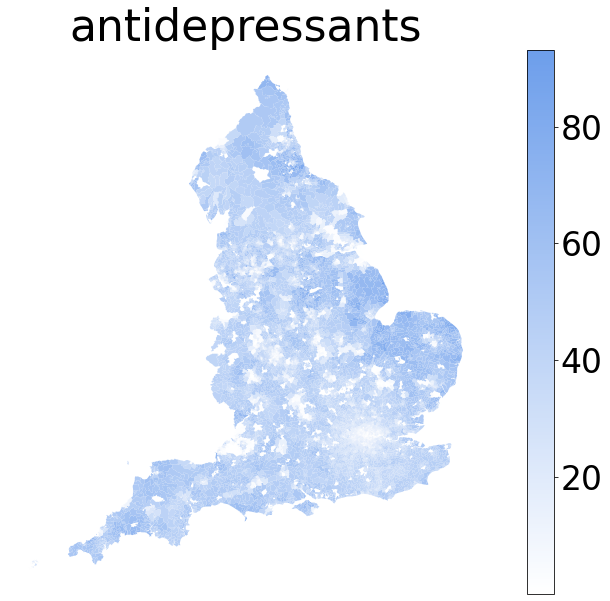

In [31]:
plot_variable(gdf, variable="o_depression_quantity_per_capita", variable_name="antidepressants")

plt.savefig("../../figures/map_antidepressants.jpg", dpi=300)